# ROSE CHART

En este caso, usaré unos datos del ayuntamiento de madrid que muestra la calidad del aire diaria en distintas estaciones https://datos.gob.es/es/catalogo/l01280796-datos-meteorologicos-datos-horarios-desde-20191

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = 'oct_meteo24.csv'
meteo_data = pd.read_csv(file_path, delimiter=';')
# Mostrar las primeras filas y la estructura del dataset para análisis
meteo_data_head = meteo_data.head()
meteo_data_columns = meteo_data.columns.tolist()
meteo_data_head, meteo_data_columns



(   PROVINCIA  MUNICIPIO  ESTACION  MAGNITUD  PUNTO_MUESTREO   ANO  MES  DIA  \
 0         28         79       102        81  28079102_81_98  2024   10    1   
 1         28         79       102        81  28079102_81_98  2024   10    2   
 2         28         79       102        81  28079102_81_98  2024   10    3   
 3         28         79       102        81  28079102_81_98  2024   10    4   
 4         28         79       102        81  28079102_81_98  2024   10    5   
 
     H01 V01  ...   H20 V20   H21 V21   H22 V22   H23 V23   H24 V24  
 0  0.60   V  ...  1.52   V  1.45   V  1.23   V  2.08   V  1.47   V  
 1  2.03   V  ...  3.15   V  3.38   V  4.57   V  3.22   V  3.57   V  
 2  3.73   V  ...  2.22   V  1.07   V  1.23   V  1.32   V  1.87   V  
 3  1.70   V  ...  1.00   V  1.13   V  1.37   V  1.10   V  1.47   V  
 4  1.33   V  ...  2.60   V  2.45   V  2.98   V  2.80   V  2.42   V  
 
 [5 rows x 56 columns],
 ['PROVINCIA',
  'MUNICIPIO',
  'ESTACION',
  'MAGNITUD',
  'PUNTO_MUEST

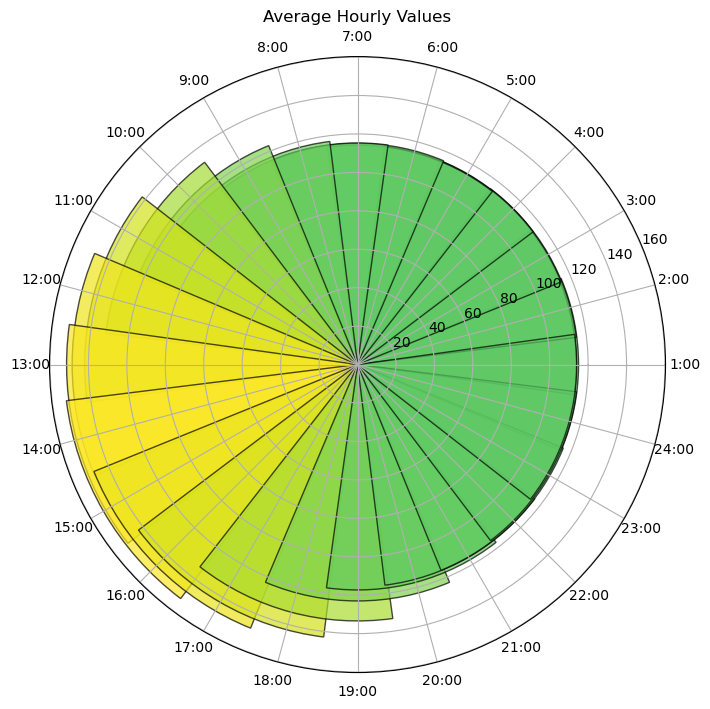

In [14]:
# Seleccionar columnas horarias (H01 a H24) y convertirlas a valores numéricos, ya que son las horas 
horas = [f'H{str(i).zfill(2)}' for i in range(1, 25)]
meteo_data[horas] = meteo_data[horas].apply(pd.to_numeric, errors='coerce')

# Calcular el promedio de cada hora (promedio de H01, H02, ..., H24)
hourly_means = meteo_data[horas].mean()

# Preparar los datos para el gráfico de rosa
values = hourly_means.values
angles = np.linspace(0, 2 * np.pi, len(values), endpoint=False).tolist()
values = np.append(values, values[0])  # Cerrar el ciclo de valores
angles += angles[:1]  # Cerrar el gráfico

# Crear el gráfico de rosa
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
bars = ax.bar(angles[:-1], values[:-1], color=plt.cm.viridis(values / max(values)), alpha=0.7, edgecolor="black")

# Configurar etiquetas y título
ax.set_xticks(angles[:-1])
ax.set_xticklabels([f'{i}:00' for i in range(1, 25)], fontsize=10)
plt.title("Average Hourly Values")
plt.show()